### DMET 901 Computer Vision 
### Team Members:
#### Nadeen Ahmad Shoukry 37-4023
#### Malak Hatem El Shenawy 37-0730
## Assignment #1
### Problem #1

In [145]:
#To plot images in line with the code
%pylab inline
# importing matplotlib to load and plot the bmp image
import matplotlib.pyplot as plt
# importing numpy library to execute operations on image
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['square']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


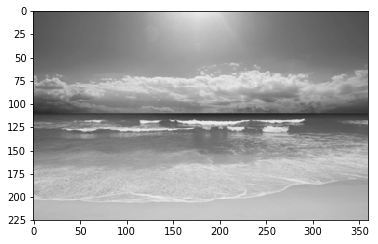

In [146]:
# Reading image
img=matplotlib.image.imread('/content/Ocean.bmp')
# Plotting image
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

## Apply Transformations on Image
### Transformation #1:
#### A=30, B=20, C=180 and D=230

In [0]:
# Equation of straight line #1
Line1x1 = 0
Line1y1 = 0
Line1x2 = 30
Line1y2 = 20
slop1 = (Line1y2 - Line1y1)/ (Line1x2 - Line1x1) 
def line1(originalIntensity):
    newIntensity = (slop1 * originalIntensity) 
    return newIntensity
# Equation of straight line #2
Line2x1 = 30
Line2y1 = 20
Line2x2 = 180
Line2y2 = 230
slop2 = (Line2y2 - Line2y1)/ (Line2x2 - Line2x1) 
def line2(originalIntensity):
    newIntensity = (slop2 * originalIntensity) -22
    return newIntensity
# Equation of straight line #3
Line3x1 = 180
Line3y1 = 230
Line3x2 = 255
Line3y2 = 255
slop3 = (Line3y2 - Line3y1)/ (Line3x2 - Line3x1) 
def line3(originalIntensity):
    newIntensity = (slop3 * originalIntensity) +170
    return newIntensity

In [0]:
from PIL import Image
img = Image.open("/content/Ocean.bmp")
# convert to grayscale 
transform1 = img.copy()
for i in range (0,img.size[0]):
    for j in range (0,img.size[1]):
        if(img.getpixel((i,j)) <= 30):
            tmp = line1(img.getpixel((i,j)))
            transform1.putpixel((i,j), int(tmp))
        if(img.getpixel((i,j)) >30 and img.getpixel((i,j)) <= 180): 
            tmp = line2(img.getpixel((i,j)))
            transform1.putpixel((i,j), int(tmp))
        if(img.getpixel((i,j)) >180 and img.getpixel((i,j)) <= 255):
            tmp = line3(img.getpixel((i,j)))
            transform1.putpixel((i,j), int(tmp))

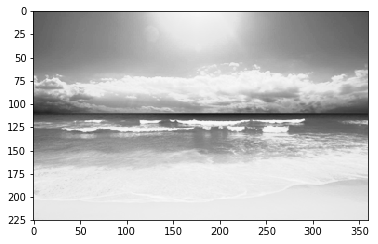

In [149]:
plt.imshow(transform1,cmap='gray',vmin=0,vmax=255)

In [0]:
transform1.save("/content/Ocean_a.bmp")

### Transformation #2:
#### A=70, B=20, C=140 and D=240


In [0]:
# Equation of straight line #1
Line1x1 = 0
Line1y1 = 0
Line1x2 = 70
Line1y2 = 20
slop1 = (Line1y2 - Line1y1)/ (Line1x2 - Line1x1) 
def line1(originalIntensity):
    newIntensity = (slop1 * originalIntensity) 
    return newIntensity
# Equation of straight line #2
Line2x1 = 70
Line2y1 = 20
Line2x2 = 140
Line2y2 = 240
slop2 = (Line2y2 - Line2y1)/ (Line2x2 - Line2x1) 
def line2(originalIntensity):
    newIntensity = (slop2 * originalIntensity) -200
    return newIntensity
# Equation of straight line #3
Line3x1 = 140
Line3y1 = 240
Line3x2 = 255
Line3y2 = 255
slop3 = (Line3y2 - Line3y1)/ (Line3x2 - Line3x1) 
def line3(originalIntensity):
    newIntensity = (slop3 * originalIntensity) +(5100/23)
    return newIntensity

In [0]:
transform2 = img.copy()
for i in range (0,img.size[0]):
    for j in range (0,img.size[1]):
        if(img.getpixel((i,j)) <= 30):
            tmp = line1(img.getpixel((i,j)))
            transform2.putpixel((i,j), int(tmp))
        if(img.getpixel((i,j)) >30 and img.getpixel((i,j)) <= 180): 
            tmp = line2(img.getpixel((i,j)))
            transform2.putpixel((i,j), int(tmp))
        if(img.getpixel((i,j)) >180):
            tmp = line3(img.getpixel((i,j)))
            transform2.putpixel((i,j), int(tmp))

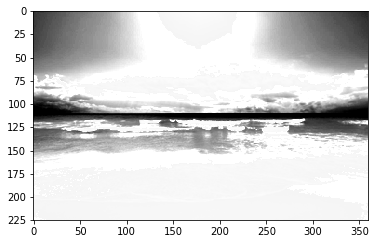

In [153]:
plt.imshow(transform2,cmap='gray',vmin=0,vmax=255)

In [0]:
transform2.save("/content/Ocean_b.bmp")

In [155]:
#Simple Example to calculate the cooccurence matrix
#a = [[4,6,8,5,4],[5,5,8,7,7],[6,7,7,7,9],[8,8,4,8,6],[9,8,9,5,6]]
#coMat = [[0,4,5,6,7,8,9], [4,0,0,0,0,0,0], [5,0,0,0,0,0,0], [6,0,0,0,0,0,0],[7,0,0,0,0,0,0],[8,0,0,0,0,0,0],[9,0,0,0,0,0,0]]
a = [[4,5,6,7,8],[4,5,6,7,8],[4,5,6,7,8],[4,5,6,7,8]]
coMat = [[0,4,5,6,7,8],[4,0,0,0,0,0],[5,0,0,0,0,0], [6,0,0,0,0,0], [7,0,0,0,0,0], [8,0,0,0,0,0]]

for i in range(len(coMat)):
    for j in range(len(coMat)):
        north = coMat[i][0]
        south = coMat[0][j]
        numrows = len(a)
        numcolumns = len(a[0])
        for x in range(numrows-1):
            for y in range(numcolumns):
                if(a[x][y] == north):
                    if(a[x+1][y] == south):
                        coMat[i][j]= coMat[i][j] +1
np.matrix(coMat)

matrix([[0, 4, 5, 6, 7, 8],
        [4, 3, 0, 0, 0, 0],
        [5, 0, 3, 0, 0, 0],
        [6, 0, 0, 3, 0, 0],
        [7, 0, 0, 0, 3, 0],
        [8, 0, 0, 0, 0, 3]])

In [156]:
contrast = 0
for i in range(1,len(coMat)):
    for j in range(1,len(coMat[0])):
        tmp = (coMat[0][j] - coMat[i][0])
        square =  (tmp) ** 2
        tmp2 = coMat[i][j] * square
        contrast += tmp2
contrast

0


## Computing the Cooccurrence Matrix of an image
### Step1: Load & Open Original Image

In [0]:
ImagePath = '/content/Ocean.bmp'
OriginalImage = Image.open(ImagePath)



### Step2: Create a Coccurrence matrix with the same dimensionality of image + 1 row and 1 column for labels

In [0]:

coMatrix = [[0 for x in range(257)] for y in range(257)]
#North/ South Cell
coMatrix[0][0] = 0
# filling the co-occurrence Matrix with the labels (available intensities)
for n in range(1,256):
    coMatrix[0][n+1]  = n
    coMatrix[n+1][0] = n


### Step3: Calculate cooccurence matrix

In [0]:
columns = OriginalImage.size[0]
rows = OriginalImage.size[1]

for i in range(0,columns):
  for j in range (0, rows-1):
    #get the intensitis of each pixel 7 the one below it 
    north = OriginalImage.getpixel((i,j))
    south = OriginalImage.getpixel((i,j+1))
    #the cell of the coccurrence of the two pixels
    coOccurrence = coMatrix[north+1][south+1]
    # increment the original value of occurrences
    coOccurrence +=1
    # assign the new value of occurences     
    coMatrix[north+1][south+1]= coOccurrence

### Compute Contrast of Image:

In [0]:
contrast = 0
for i in range(1,256):
  for j in range(1,256):
    # the value of coccurrence
    cooccurrence = coMatrix[i][j]
    # subtract the matching labels (intensities) 
    b  = coMatrix[i+1][0] - coMatrix[0][j+1]
    # square the value
    b  = np.power(b,2)
    # multiply the squared difference of the intensities by the number of coccurences
    tmp = cooccurrence *b
    # add value to contrast
    contrast += tmp

In [186]:
print("Contrast of Original Image: ",contrast)

Contrast of Original Image:  9631290


In [188]:
ContrastoFOriginalImage = contrast
ContrastoFOriginalImage

9631290

### Compute Contrast of transformed images

In [0]:
ImagePathA = '/content/Ocean_a.bmp'
ImagePathB = '/content/Ocean_b.bmp'
def CooccurrenceMatrix(ImagePath):
  OriginalImage = Image.open(ImagePath)
  coMatrix = [[0 for x in range(257)] for y in range(257)]
  coMatrix[0][0] = 0
  for n in range(1,256):
       coMatrix[0][n+1]  = n
       coMatrix[n+1][0] = n
  columns = OriginalImage.size[0]
  rows = OriginalImage.size[1]

  for i in range(0,columns):
     for j in range (0, rows-1):
        north = OriginalImage.getpixel((i,j))
        south = OriginalImage.getpixel((i,j+1))
        coOccurrence = coMatrix[north+1][south+1]
        coOccurrence +=1
        coMatrix[north+1][south+1]= coOccurrence
  return coMatrix

In [0]:
def contrast(coMatrix):
    contrast = 0
    for i in range(1,256):
       for j in range(1,256):
            cooccurrence = coMatrix[i][j]
            b  = coMatrix[i+1][0] - coMatrix[0][j+1]
            b  = np.power(b,2)
            tmp = cooccurrence *b
            contrast += tmp
    return contrast

In [176]:
MatrixA = CooccurrenceMatrix(ImagePathA)
ContrastA = contrast(MatrixA)
ContrastA

12262910

In [177]:
MatrixB = CooccurrenceMatrix(ImagePathB)
ContrastB = contrast(MatrixB)
ContrastB

20386351

In [190]:
ContrastoFOriginalImage


9631290

In [0]:
file1 = open("/content/contrast.txt","a") 
str1 = "Contrast of Original Image: "
str2 = str(ContrastoFOriginalImage)
str3 = "\n"

str4 = "Contrast of  ImageA: "
str5 = str(ContrastA)
str6 = "\n"

str7 = "Contrast of  ImageB: "
str8 = str(ContrastB)
str9 = "\n"


file1.writelines([str1, str2, str3, str4, str5, str6,str7, str8, str9])

file1.close() 